# QTW Case Study - 4 : Signal Frontier Analysis

### Author : Rajeev Kumar
### Section: MSDS 7333 Quantifying the World - 401


## 1. Abstract
This case study conducts <b>Signal Frontier Analysis </b> on the portfolio of top healthcare stocks. Sharpe Ratio is used to determine and compare the performance of the portfolio of stocks for different strategies of selling, buying, and holding stocks. A heat map is generated for different combinations of holding and lookback periods, and it can suggest the best strategy for highest returns for intermediate momentum (3 Months to 12 Months).  


## 2. Introduction
In this notebook, <b>the top 5 healthcare stocks </b> by market cap will be picked and analyzed. We will analyze the stock price data for the last one year (From 2016-09-27 to 2017-09-26).  We will use pandas timeseries methods and functions to analyze adjusted closing prices of healthcare stocks. Also, we will use "sharpe ratio" as a key performance metric for our study.

Sharpe Ratio is a measure that tells the average return minus the risk-free return divided by the standard deviation of return on investment. “The Sharpe Ratio can be considered a special case of the more general construct of the ratio of the mean of any distribution to its standard deviation” – William F. Sharpe. 



## 3. Method
The stock price data will be extracted using <b>pandas' DataReader library </b> and from <b> Yahoo Finance </b> web portal. The signal-frontier analysis will be performed for a portfolio of healthcare top stocks. Also, we will analyze the different strategies for holding and lookback period to ascertain the best strategy that guarantees the higher return. Return will be determined using "Sharpe Ratio", and heat map will be produced for different combinations of holding and lookback periods.


In [1]:
# Import All Required Libraries

from pandas_datareader import data, wb
import pandas as pd
from datetime import datetime
from pandas import Series
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# List of Top 5 Healthcare Stocks
stocklist = ['JNJ','PFE','NVS','UNH','MRK']

#Time for which stocks prices will be extracted
start = datetime(2016,9,27)
end = datetime(2017,9,26)

#Stock WebProvider
provider="yahoo"

#Extract Stock's data from yahoo finance
stockdata = data.DataReader(stocklist,provider,start,end)

## 4. DataSet Description

In [3]:
# Stock Panel Data


stockdata

<class 'pandas.core.panel.Panel'>
Dimensions: 6 (items) x 252 (major_axis) x 5 (minor_axis)
Items axis: Adj Close to Volume
Major_axis axis: 2017-09-26 00:00:00 to 2016-09-27 00:00:00
Minor_axis axis: JNJ to UNH

#### Panel data consists of 3 dimensional frame with 6 items, 252 rows, 5 columns

In [4]:
# Axes of Panel Data

stockdata.axes

[Index(['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object'),
 DatetimeIndex(['2017-09-26', '2017-09-25', '2017-09-22', '2017-09-21',
                '2017-09-20', '2017-09-19', '2017-09-18', '2017-09-15',
                '2017-09-14', '2017-09-13',
                ...
                '2016-10-10', '2016-10-07', '2016-10-06', '2016-10-05',
                '2016-10-04', '2016-10-03', '2016-09-30', '2016-09-29',
                '2016-09-28', '2016-09-27'],
               dtype='datetime64[ns]', name='Date', length=252, freq=None),
 Index(['JNJ', 'MRK', 'NVS', 'PFE', 'UNH'], dtype='object')]

####  Panel Data has 252 observations (from '2016-09-27' to '2017-09-26') for 5 stocks (Johnson & Johnson, Pfizer Inc., Novartis AG,UnitedHealth Group Incorporated, and Merck & Co., Inc.) and has Adjusted Close Price, Close Price, High Price, Low Price, Open Price and Volumns for each stock.

In [5]:
#Get Adjusted Close Price for all stocks
price=stockdata['Adj Close']

## 5. Exploratory Data Analysis

In [6]:
price.head()

,JNJ,MRK,NVS,PFE,UNH
Date,,,,,
2017-09-26,130.940002,64.760002,85.239998,35.299999,192.699997
2017-09-25,131.169998,65.180000,86.230003,35.509998,191.750000
2017-09-22,131.389999,65.129997,86.160004,35.959999,193.029999
2017-09-21,131.750000,65.599998,84.940002,35.970001,195.210007
2017-09-20,133.220001,65.790001,85.779999,35.990002,195.750000


In [7]:
price.describe()

,JNJ,MRK,NVS,PFE,UNH
count,252.000000,252.000000,252.000000,252.000000,252.000000
mean,121.990496,61.981807,76.415883,32.502108,168.245368
std,8.429252,2.034283,6.177994,1.296591,18.064645
min,108.841667,56.739002,65.215652,28.734835,131.846603
25%,113.551065,60.493192,71.197861,31.567714,158.668991
50%,122.172501,62.273375,75.481888,32.730289,166.126747
75%,131.034096,63.383963,82.552502,33.381887,184.606922
max,135.706741,66.160004,86.339996,35.990002,199.580002


####  Pfizer has the lowest standard deviation which indicates a stable stock price. Whereas United Health has the highest standard deviation  which suggest the highest variation in stock price.

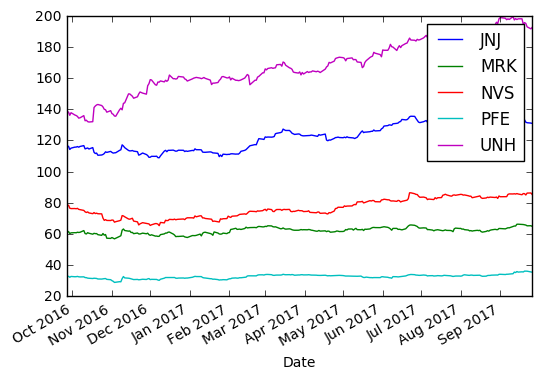

In [8]:
price.plot()

#### From the above chart, it is evident that JNJ has the highest return.

In [9]:
#Replace NA with forward fill
price = price.fillna(method='ffill')

In [10]:
#Calculated % Change
rets = price.pct_change()

In [11]:
rets.head()

,JNJ,MRK,NVS,PFE,UNH
Date,,,,,
2017-09-26,NaN,NaN,NaN,NaN,NaN
2017-09-25,0.001756,0.006485,0.011614,0.005949,-0.004930
2017-09-22,0.001677,-0.000767,-0.000812,0.012673,0.006675
2017-09-21,0.002740,0.007216,-0.014160,0.000278,0.011294
2017-09-20,0.011158,0.002896,0.009889,0.000556,0.002766


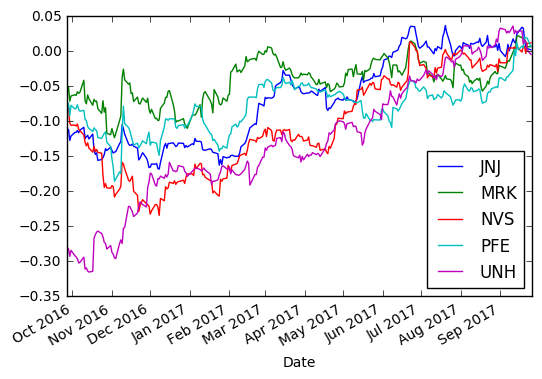

In [12]:
# Plot cumulative returns of all stocks 
((1 + rets).cumprod() - 1).plot()

##### From the above chart it is evident that United Health has given steadily increasing return on investment as compared to other stocks. Whereas Pfizer was at stable price throughout the year.

# 6. Results

In [13]:
#Define MoM function
def calc_mom(price, lookback, lag):
  mom_ret = price.shift(lag).pct_change(lookback)
  ranks = mom_ret.rank(axis=1, ascending=False)
  demeaned = ranks - ranks.mean(axis=0)
  return demeaned / demeaned.std(axis=0)

In [14]:
#Define Daily Sharp Ration
compound = lambda x : (1 + x).prod() - 1
daily_sr = lambda x: x.mean() / x.std()



In [15]:
# Define Strategy Backtesting Function.
# This function calculates overall sharp ration of portfolio of stocks considering lookback and holding days.

def strat_sr(price, lb, hold):
# Compute portfolio weights
  freq = '%dB' % hold
  port = calc_mom(price, lb, lag=1)
  daily_rets = price.pct_change()
# Compute portfolio returns
  port = port.shift(1).resample(freq, how='first')
  returns = daily_rets.resample(freq, how=compound)
  port_rets = (port * returns).sum(axis=1)
  
  return daily_sr(port_rets) * np.sqrt(252 / hold)

In [16]:
# Overall Sharpratio with lookback of 50 days and holding of 30 days
strat_sr(price, 50, 30)

-2.4020198639455401

#### Overall portfolio return with 50 days look back and 30 days holding period is negative.

In [17]:
# Heatmap for overall Sharp Ratio
# Define array of lookbacks and holding periods.

from collections import defaultdict
lookbacks = range(20, 100, 5)
holdings = range(20, 100, 5)
dd = defaultdict(dict)
for lb in lookbacks:
  for hold in holdings:
    dd[lb][hold] = strat_sr(price, lb, hold)
    ddf = DataFrame(dd)
    ddf.index.name = 'Holding Period'
    ddf.columns.name = 'Lookback Period'

In [18]:
# HeatMap Function

def heatmap(df, cmap=plt.cm.get_cmap('Spectral')):
  fig = plt.figure()
  ax = fig.add_subplot(111)
  axim = ax.imshow(df.values, cmap=cmap, interpolation='nearest')
  ax.set_xlabel(df.columns.name)
  ax.set_xticks(np.arange(len(df.columns)))
  ax.set_xticklabels(list(df.columns))
  ax.set_ylabel(df.index.name)
  ax.set_yticks(np.arange(len(df.index)))
  ax.set_yticklabels(list(df.index))
  plt.colorbar(axim)

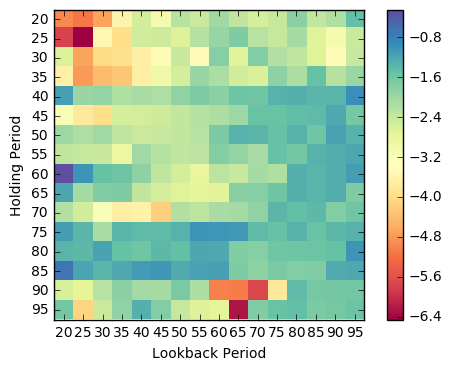

In [19]:
heatmap(ddf)

#### The best/optimal return, from the above heatmap , is 60 days holding period with 20 days lookback period.

## 7. Conclusion
Signal Frontier analysis can be used by portfolio manager to assess the return on investment of portfolio of stocks as compared to the risk free investment. High and positive sharpe value indicate that return is better than risk free investment. Negative value of sharpe ratio means the lower return on investment as compared to risk free return. Thus Sharpe Ratio can be a handy metric at portfolio manager's disposal to devise a strategy that guarantees higher return at lower risk for a portfolio of stocks.

# 8. References:-
  1. https://finance.yahoo.com/lookup/
  2. https://s3-us-west-2.amazonaws.com/smu-mds/prod/Quantifying+the+World/Course+Materials/Python4DataAnalysis.pdf
    